In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('../Dataset/Spotify/data.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [66]:
df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.143,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.882,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.616,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.413,110.547,190239,5,1
194,0.747,0.6660,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4,1


In [67]:
df.shape

(195, 14)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [69]:
df.isnull().sum()/df.shape[0]*100

danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
liked               0.0
dtype: float64

In [70]:
df.duplicated().sum()

0

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,195.0,0.636656,0.216614,0.130000,0.4625,0.705000,0.7990,0.946
energy,195.0,0.638431,0.260096,0.002400,0.5335,0.659000,0.8375,0.996
key,195.0,5.497436,3.415209,0.000000,2.0000,6.000000,8.0000,11.000
loudness,195.0,-9.481631,6.525086,-42.261000,-9.9620,-7.766000,-5.8290,-2.336
mode,195.0,0.538462,0.499802,0.000000,0.0000,1.000000,1.0000,1.000
speechiness,195.0,0.148957,0.120414,0.027800,0.0568,0.096200,0.2305,0.540
acousticness,195.0,0.319093,0.320782,0.000003,0.0422,0.213000,0.5040,0.995
instrumentalness,195.0,0.192337,0.346226,0.000000,0.0000,0.000008,0.0975,0.969
liveness,195.0,0.148455,0.105975,0.033100,0.0840,0.105000,0.1770,0.633
valence,195.0,0.493632,0.267695,0.035300,0.2690,0.525000,0.7175,0.980


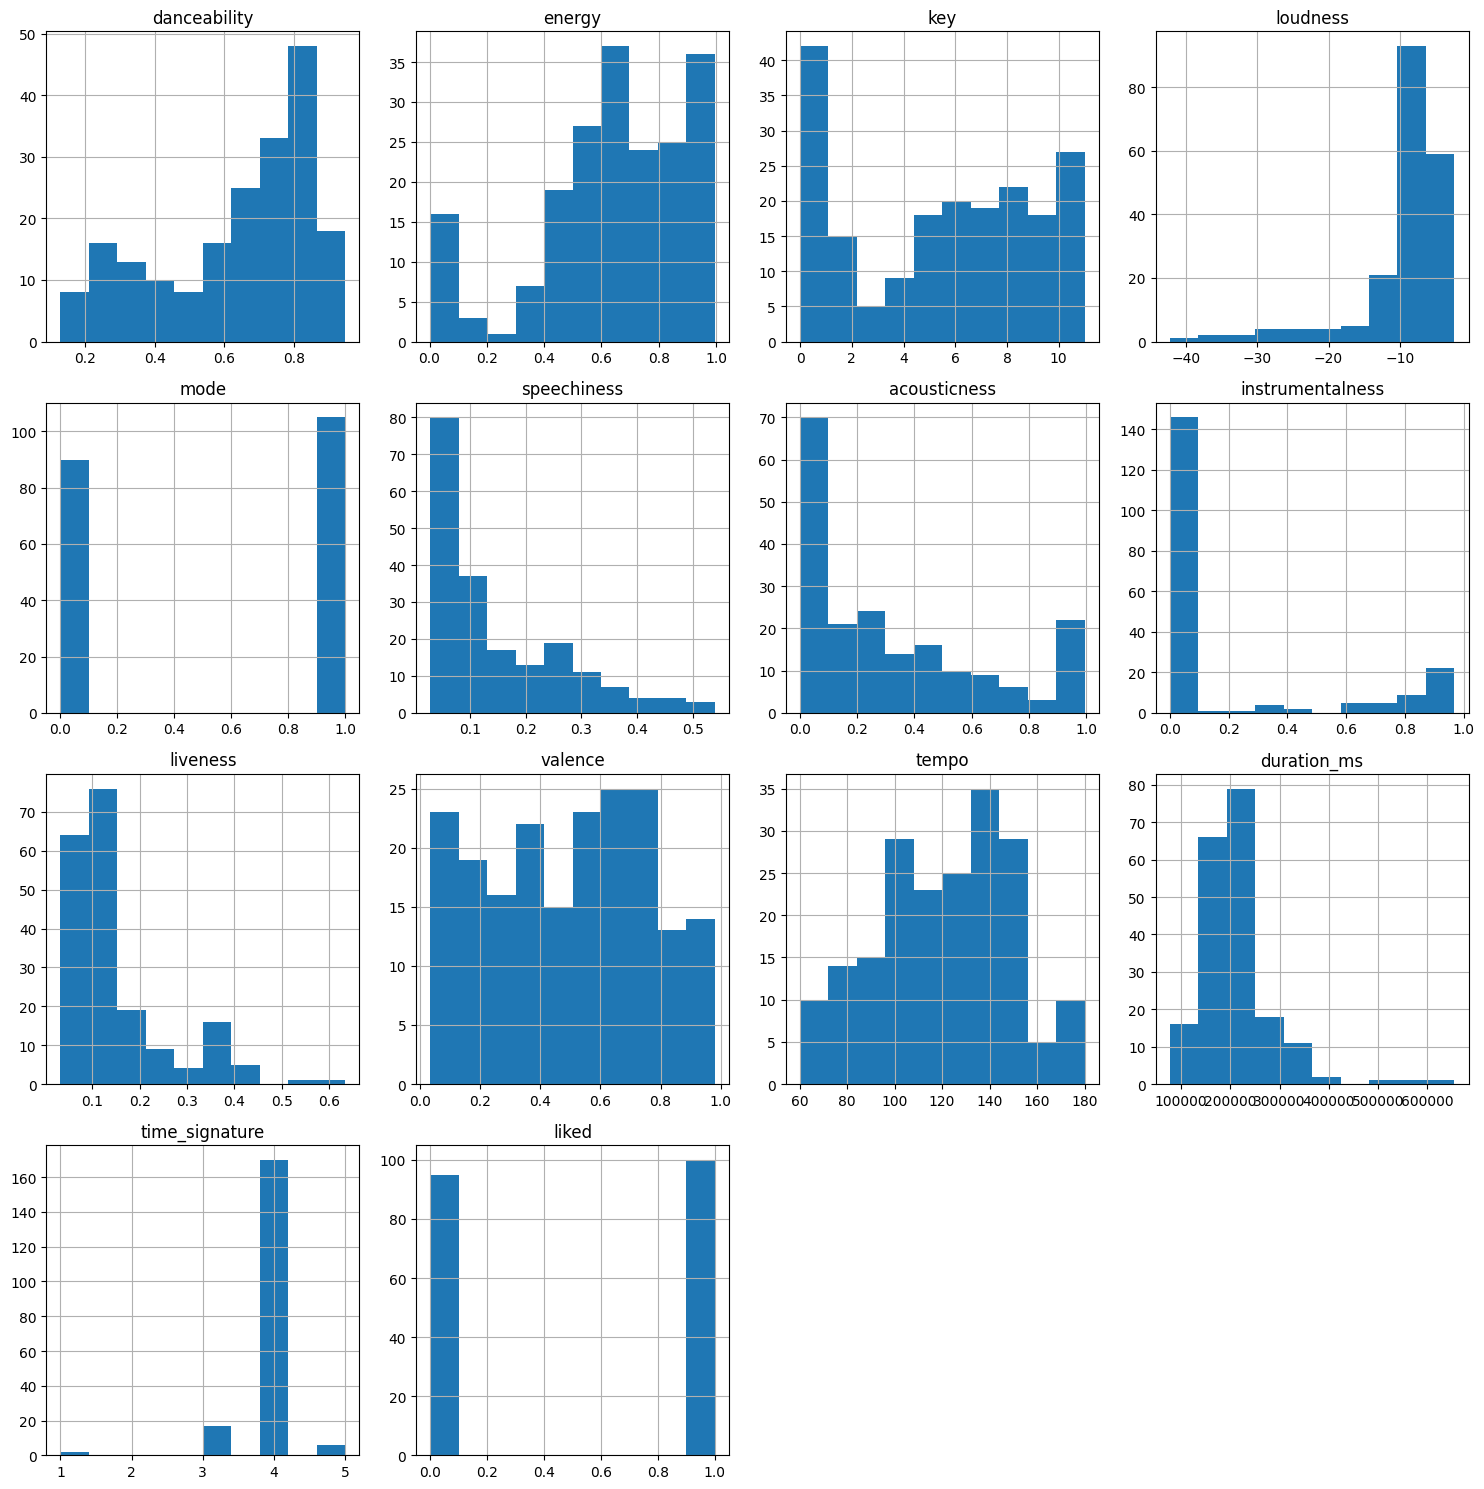

In [72]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [73]:
print(df.select_dtypes(include="number").skew())

danceability       -0.764603
energy             -0.806487
key                -0.140121
loudness           -2.525517
mode               -0.155502
speechiness         1.185308
acousticness        0.890650
instrumentalness    1.391364
liveness            1.823777
valence            -0.065798
tempo              -0.160705
duration_ms         2.088179
time_signature     -3.089332
liked              -0.051697
dtype: float64


In [74]:
# Ada skewness extreme, di tangani dengan log tranform
df['duration_log'] = np.log1p(df['duration_ms'])
df['liveness_log'] = np.log1p(df['liveness'])
df['speechiness_log'] = np.log1p(df['speechiness'])

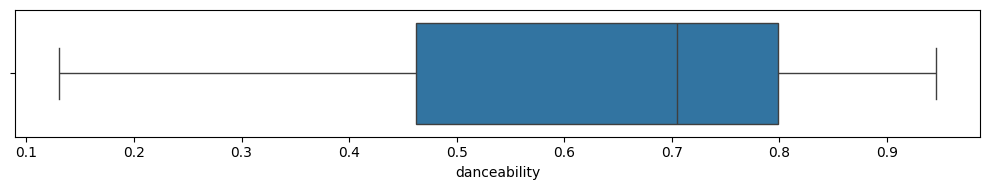

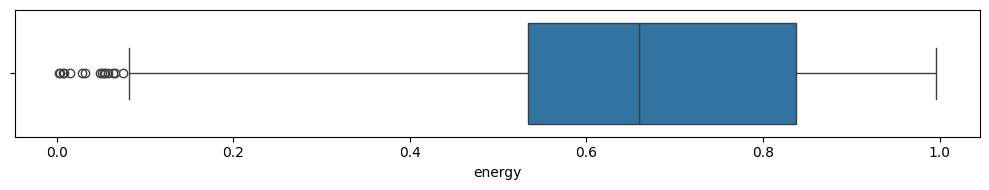

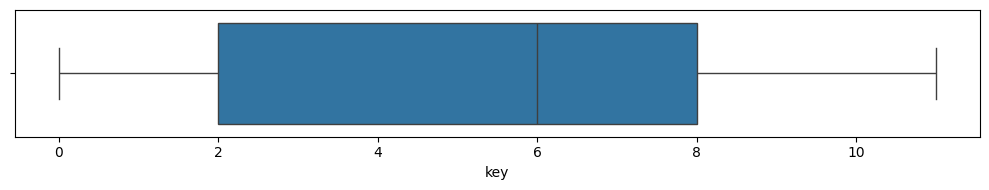

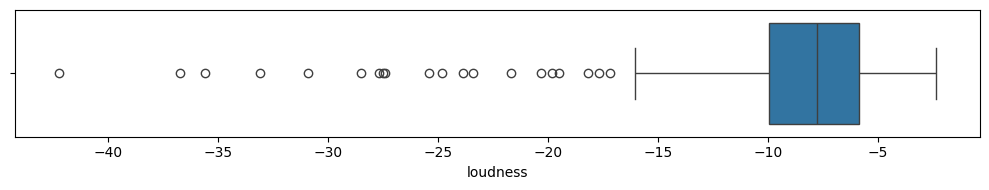

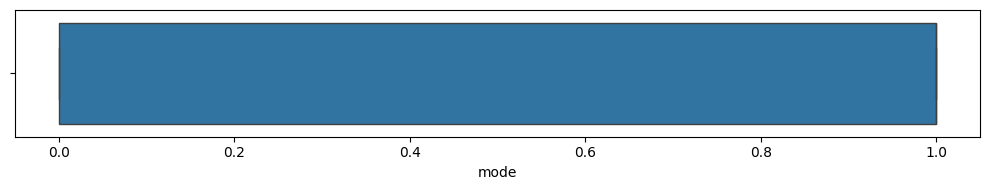

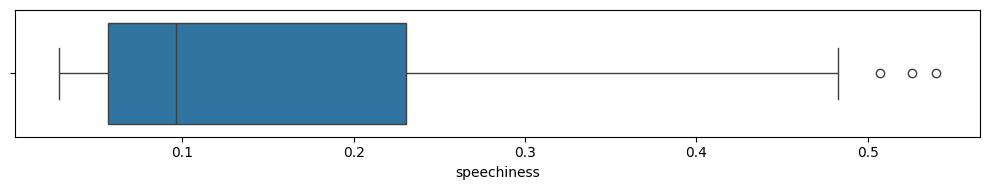

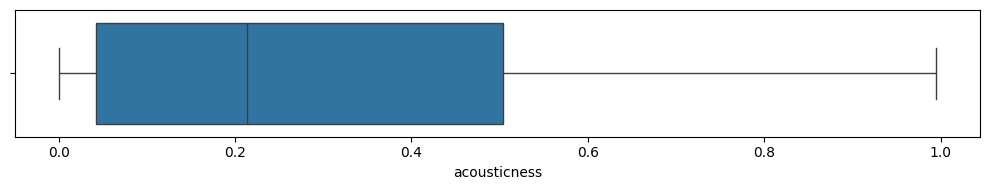

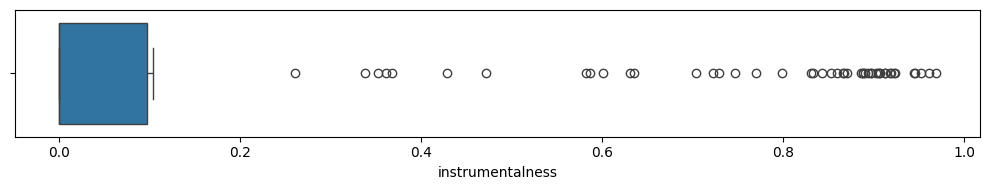

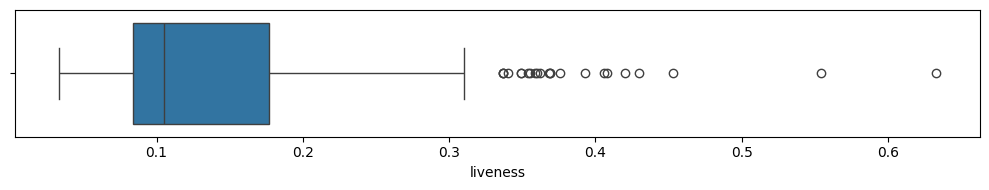

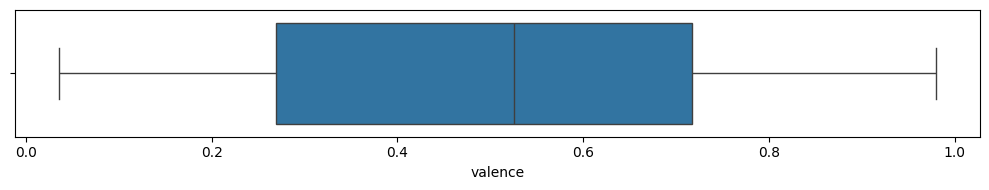

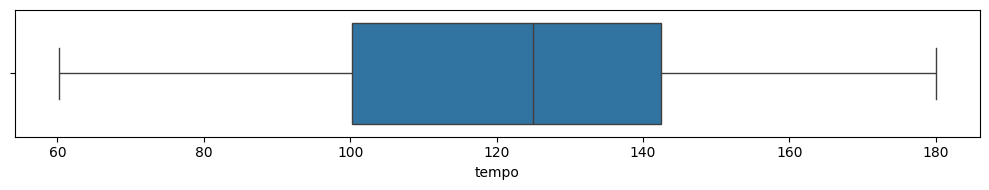

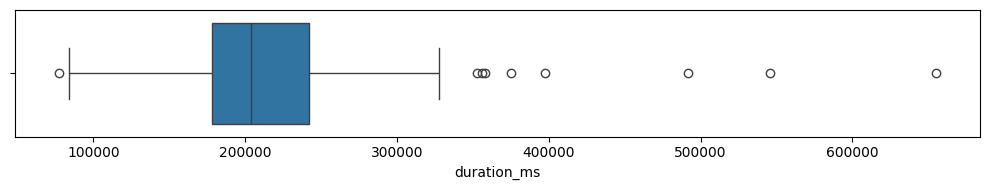

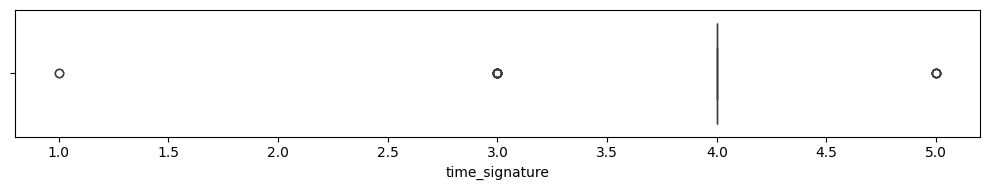

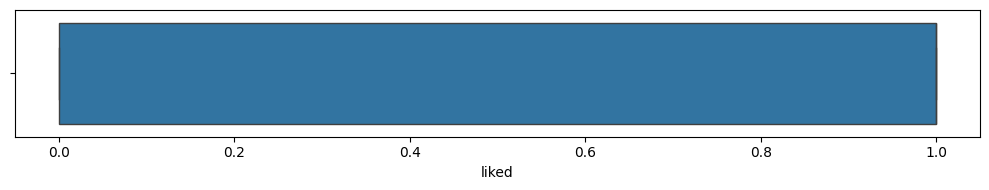

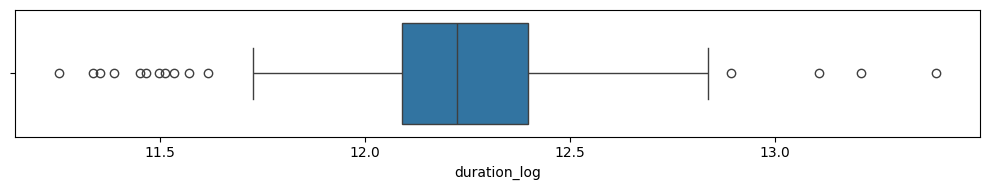

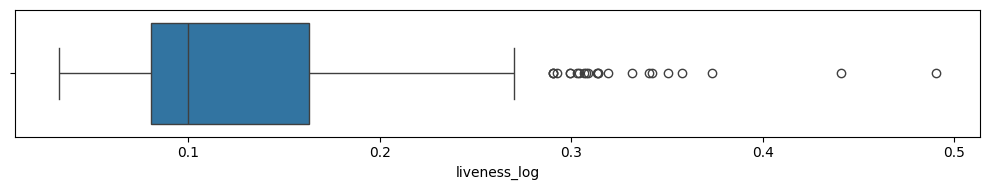

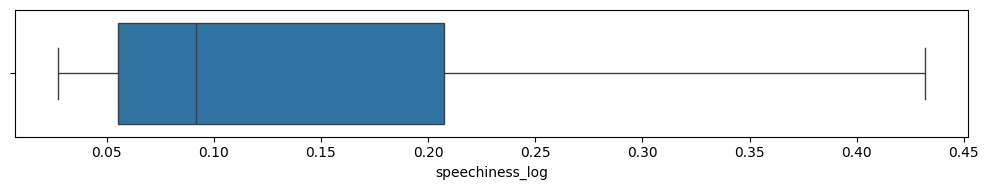

In [75]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(data=df, x=i)

    plt.tight_layout()
    plt.show()

<Axes: >

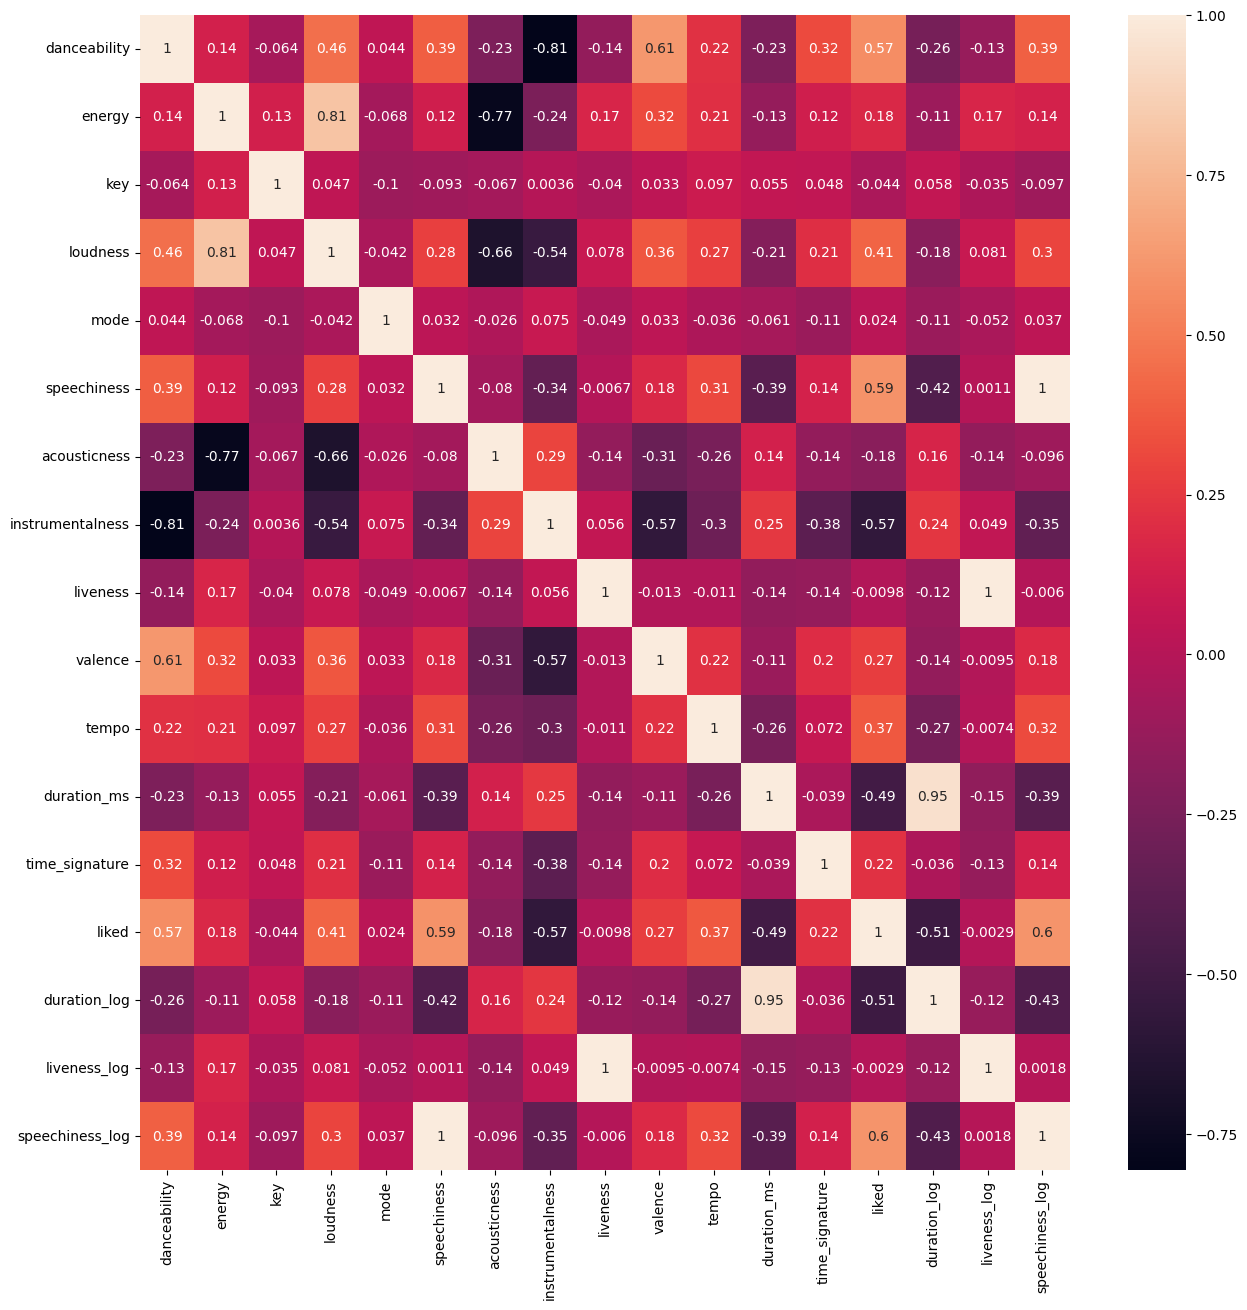

In [76]:
s = df.select_dtypes(include="number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [77]:
df = df.drop(columns=['energy', 'duration_ms', 'liveness', 'speechiness'])

In [90]:
# Content-Based Recomendation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

feature_cols = [
    'loudness', 'acousticness', 'danceability', 'valence', 'tempo', 
    'key', 'mode', 'instrumentalness',
    'duration_log', 'liveness_log', 'speechiness_log'
]

# Scaling sama rata 0 sampai 1
scaler = MinMaxScaler()
X_scaled_array = scaler.fit_transform(df[feature_cols])
df_scaled = pd.DataFrame(X_scaled_array, columns=feature_cols, index=df.index)


def recommend_based_on_history(num_recommendations):
    # Liked_indices adalah array yang isinya index lagu yang di-like user
    liked_indices = df[df['liked'] == 1].index
    # kalau ga ada lagu yang di-like, return pesan
    if len(liked_indices) == 0:
        return "User belum me-like lagu apapun. Tidak bisa rekomendasi."
    # Ambil fitur dari lagu yang di-like user
    liked_songs_features = df_scaled.loc[liked_indices]
    # Rata-rata fitur dari lagu yang di-like user -> user profile vector
    user_profile_vector = liked_songs_features.mean(axis=0).values.reshape(1, -1)

    # Ambil fitur dari lagu yang tidak di-like user (candidate songs)
    candidate_indices = df[df['liked'] == 0].index
    candidate_features = df_scaled.loc[candidate_indices]

    # Hitung cosine similarity antara user profile vector dengan candidate songs
    sim_scores = cosine_similarity(user_profile_vector, candidate_features)

    # Ambil skor similarity dari array 2D ke 1D
    sim_scores = sim_scores[0]

    # Buat DataFrame rekomendasi dengan skor similarity
    recommendations = df.loc[candidate_indices].copy()
    recommendations['similarity_score'] = sim_scores

    # Sortir rekomendasi berdasarkan skor similarity tertinggi
    top_recs = recommendations.sort_values(by='similarity_score', ascending=False).head(num_recommendations)

    return top_recs[['similarity_score'] + feature_cols]

In [91]:
# Kalau mau check
liked_indices = df[df['liked'] == 1].index
liked_songs = df.loc[liked_indices]

print(f"Jumlah lagu yang di-like: {len(liked_songs)}")
print("\n5 Lagu teratas yang di-Like:")
# Tampilkan nama dan fitur utamanya
cols_to_show = ['loudness', 'acousticness', 'danceability']
print(liked_songs[cols_to_show].head(5))

print("\nRata-rata profil lagu yang di-like:")
mean_profile = liked_songs[feature_cols].mean()
print(mean_profile)

print("\n" + "="*40 + "\n")

# Hasil rekomendasi
print("Hasil Rekomendasi:")
print(recommend_based_on_history(5))

Jumlah lagu yang di-like: 100

5 Lagu teratas yang di-Like:
   loudness  acousticness  danceability
1    -7.951        0.2060         0.762
3    -6.994        0.4310         0.722
4    -7.516        0.1450         0.787
5    -6.415        0.0404         0.778
6    -8.405        0.5550         0.666

Rata-rata profil lagu yang di-like:
loudness             -6.875870
acousticness          0.263154
danceability          0.756570
valence               0.563548
tempo               131.221270
key                   5.350000
mode                  0.550000
instrumentalness      0.000668
duration_log         12.063591
liveness_log          0.134320
speechiness_log       0.192306
dtype: float64


Hasil Rekomendasi:
     similarity_score  loudness  acousticness  danceability  valence    tempo  \
130          0.950042    -5.357        0.0696         0.909    0.844  126.063   
164          0.937480    -6.366        0.1950         0.889    0.966  110.842   
157          0.930184    -2.588        0.41